In [1]:
#!pip install mlxtend
#!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.6-cp37-none-any.whl size=72864 sha256=1fa528faa0e9a9fa2e7d73bcdbc51f8fef40a604a11946882d9676956decd68a
  Stored in directory: C:\Users\ven_n_000\AppData\Local\pip\Cache\wheels\57\4e\e8\bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5493 sha256=b644f5d4ca834962d5f61bda61d6a99fcb2c1d20390eaeb2519fadd27be58502
  Stored in directory: C:\Users\ven_n_000\AppData\Local\pip\Cache\wheels\11\94\81\312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify


In [2]:
import numpy as np 
import pandas as pd
import pandas_profiling as pf
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
transaction_df = pd.read_csv("BreadBasket_DMS.csv")
transaction_df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:
pf.ProfileReport(transaction_df)

In [5]:
transaction_df["Transaction"].describe()

count    21293.000000
mean      4951.990889
std       2787.758400
min          1.000000
25%       2548.000000
50%       5067.000000
75%       7329.000000
max       9684.000000
Name: Transaction, dtype: float64

In [6]:
pd.to_datetime(transaction_df["Date"], format='%Y-%m-%d', errors='ignore')

0       2016-10-30
1       2016-10-30
2       2016-10-30
3       2016-10-30
4       2016-10-30
           ...    
21288   2017-04-09
21289   2017-04-09
21290   2017-04-09
21291   2017-04-09
21292   2017-04-09
Name: Date, Length: 21293, dtype: datetime64[ns]

In [7]:
transaction_df['DateTime'] =transaction_df[['Date', 'Time']].apply(lambda x: ''.join(x), axis=1)

In [8]:
transaction_df.head()

,Date,Time,Transaction,Item,DateTime
0,2016-10-30,09:58:11,1,Bread,2016-10-3009:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-3010:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-3010:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-3010:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-3010:07:57


In [9]:
transaction_df["DateTime"]=pd.to_datetime(transaction_df["DateTime"], format='%Y-%m-%d%H:%M:%S')

In [10]:
transaction_df.head()

,Date,Time,Transaction,Item,DateTime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [11]:
#pf.ProfileReport(transaction_df)

In [15]:
transaction_df.select_dtypes(include=['object']).columns

Index(['Date', 'Time', 'Item'], dtype='object')

In [16]:
transaction_df.select_dtypes(include=['int64','float64']).columns

Index(['Transaction'], dtype='object')

In [17]:
transaction_df.select_dtypes(include=['datetime']).columns

Index(['DateTime'], dtype='object')

In [20]:
transaction_df.Item.dtype

dtype('O')

In [21]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 5 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
DateTime       21293 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 831.9+ KB


In [22]:
transaction_df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
DateTime       0
dtype: int64

In [23]:
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]
print("There are "+str(len(transaction_df[transaction_df.Item.isin(missing_value)]))+" undefined values in the dataframe.")
transaction_df[transaction_df.Item.isin(missing_value)]

There are 786 undefined values in the dataframe.


,Date,Time,Transaction,Item,DateTime
26,2016-10-30,10:27:21,11,NONE,2016-10-30 10:27:21
38,2016-10-30,10:34:36,15,NONE,2016-10-30 10:34:36
39,2016-10-30,10:34:36,15,NONE,2016-10-30 10:34:36
66,2016-10-30,11:05:30,29,NONE,2016-10-30 11:05:30
80,2016-10-30,11:37:10,37,NONE,2016-10-30 11:37:10
...,...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE,2017-04-08 11:54:22
21122,2017-04-08,12:58:25,9599,NONE,2017-04-08 12:58:25
21254,2017-04-09,12:01:07,9666,NONE,2017-04-09 12:01:07
21255,2017-04-09,12:04:13,9667,NONE,2017-04-09 12:04:13


In [24]:
transaction_df = transaction_df.drop(transaction_df[transaction_df.Item == "NONE"].index)
print("Number of rows: "+str(len(transaction_df)))
transaction_df.head(10)

Number of rows: 20507


,Date,Time,Transaction,Item,DateTime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57
5,2016-10-30,10:07:57,3,Cookies,2016-10-30 10:07:57
6,2016-10-30,10:08:41,4,Muffin,2016-10-30 10:08:41
7,2016-10-30,10:13:03,5,Coffee,2016-10-30 10:13:03
8,2016-10-30,10:13:03,5,Pastry,2016-10-30 10:13:03
9,2016-10-30,10:13:03,5,Bread,2016-10-30 10:13:03


In [25]:
transaction_df=transaction_df.drop(['Date', 'Time'], axis=1)

In [26]:
transaction_df.head(10)

,Transaction,Item,DateTime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57
5,3,Cookies,2016-10-30 10:07:57
6,4,Muffin,2016-10-30 10:08:41
7,5,Coffee,2016-10-30 10:13:03
8,5,Pastry,2016-10-30 10:13:03
9,5,Bread,2016-10-30 10:13:03


In [27]:
transaction_df=transaction_df.set_index("DateTime")
transaction_df.head()

,Transaction,Item
DateTime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam


In [31]:
number_of_items = len(transaction_df)

number_of_days = len(np.unique(transaction_df.index.date))
number_of_months = len(np.unique(transaction_df.index.month))
average_number_of_items_sold = int(number_of_items / number_of_days)
unique_number_of_items = transaction_df.Item.unique().size
print("There are "+str(unique_number_of_items)+" unique items sold by the Bakery")
print("There are "+str(number_of_items)+" items sold in "+str(number_of_days)+" days throughout "+str(number_of_months)+" months")
print("With an average of "+str(average_number_of_items_sold)+" items sold daily")

There are 94 unique items sold by the Bakery
There are 20507 items sold in 159 days throughout 7 months
With an average of 128 items sold daily


In [32]:
transaction_df.Item.value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
Raw bars             1
Olum & polenta       1
Gift voucher         1
Adjustment           1
Name: Item, Length: 94, dtype: int64

In [33]:
transaction_df.Item.value_counts(normalize=True)

Coffee            0.266787
Bread             0.162140
Tea               0.069976
Cake              0.049983
Pastry            0.041742
                    ...   
Chicken sand      0.000049
Raw bars          0.000049
Olum & polenta    0.000049
Gift voucher      0.000049
Adjustment        0.000049
Name: Item, Length: 94, dtype: float64

[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'Item')]

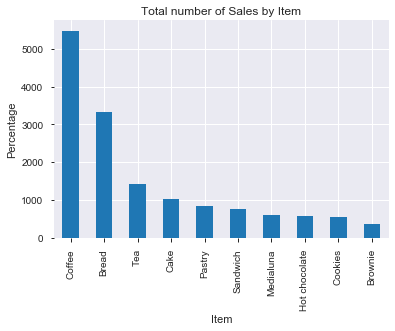

In [34]:
transaction_df.Item.value_counts()[:10].plot(kind="bar", title="Total number of Sales by Item").set(xlabel="Item", ylabel="Percentage")

[Text(0, 0.5, 'Percentage'), Text(0.5, 0, 'Item')]

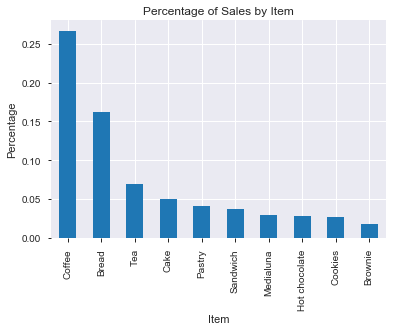

In [35]:
transaction_df.Item.value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

In [36]:
transaction_df["Item"].resample("D").count()

DateTime
2016-10-30    170
2016-10-31    199
2016-11-01    150
2016-11-02    164
2016-11-03    189
             ... 
2017-04-05    143
2017-04-06    118
2017-04-07     99
2017-04-08    205
2017-04-09     69
Freq: D, Name: Item, Length: 162, dtype: int64

[Text(0, 0.5, 'Total Number of Items Sold'), Text(0.5, 0, 'Date')]

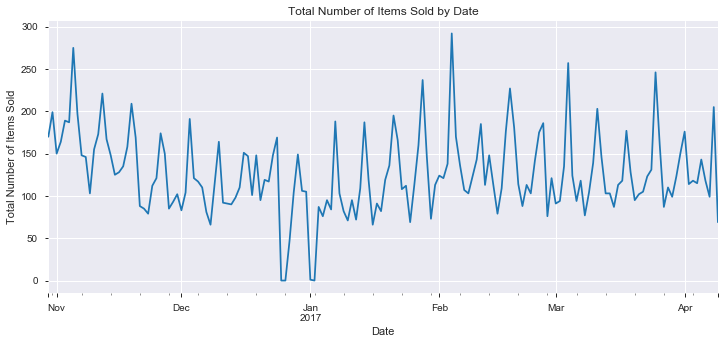

In [37]:
transaction_df["Item"].resample("D").count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [38]:
transaction_df["Item"].resample("M").count()

DateTime
2016-10-31     369
2016-11-30    4436
2016-12-31    3339
2017-01-31    3356
2017-02-28    3906
2017-03-31    3944
2017-04-30    1157
Freq: M, Name: Item, dtype: int64

[Text(0, 0.5, 'Total Number of Items Month'), Text(0.5, 0, 'Month')]

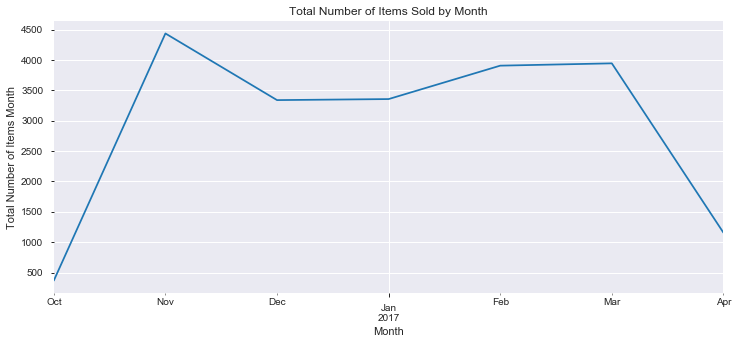

In [39]:
transaction_df["Item"].resample("M").count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Month").set(xlabel="Month", ylabel="Total Number of Items Month")

In [40]:
transaction_df["Hour"] = transaction_df.index.hour
transaction_df["Weekday"] = transaction_df.index.weekday + 1

transaction_df

,Transaction,Item,Hour,Weekday
DateTime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7
...,...,...,...,...
2017-04-09 14:32:58,9682,Coffee,14,7
2017-04-09 14:32:58,9682,Tea,14,7
2017-04-09 14:57:06,9683,Coffee,14,7


In [41]:
np.unique(transaction_df['Weekday'])

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [43]:
transaction_df_group_by_hour = transaction_df.groupby("Hour").agg({"Item": lambda item: item.count()/number_of_days})
transaction_df_group_by_hour

,Item
Hour,
1,0.006289
7,0.150943
8,4.056604
9,12.364780
10,16.767296
11,19.509434
12,17.949686
13,16.459119
14,16.603774


[Text(0, 0.5, 'Average Number of Items Sold'),
 Text(0.5, 0, 'Hour of the Day (24 hour time)')]

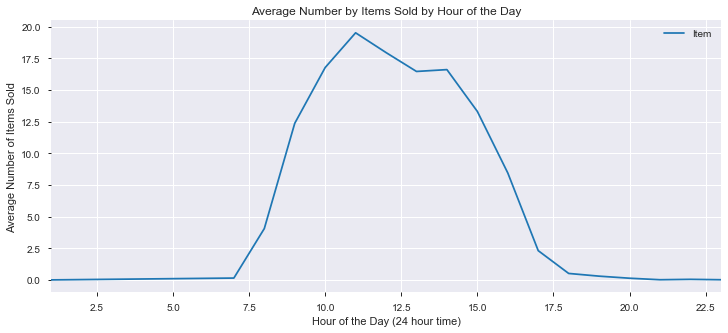

In [44]:
transaction_df_group_by_hour.plot(y="Item", figsize=(12,5), title="Average Number by Items Sold by Hour of the Day").set(xlabel="Hour of the Day (24 hour time)", ylabel="Average Number of Items Sold")

In [45]:
transaction_df_group_by_weekday = transaction_df.groupby("Weekday").agg({"Item": lambda item: item.count()})
transaction_df_group_by_weekday

,Item
Weekday,
1,2324
2,2392
3,2321
4,2646
5,3124
6,4605
7,3095


In [46]:
monday = 0
tuesday = 0
wednesday = 0
thursday = 0
friday = 0
saturday = 0
sunday = 0

for day in np.unique(transaction_df.index.date):
    if day.isoweekday() == 1:
        monday += 1
    elif day.isoweekday() == 2:
        tuesday += 1
    elif day.isoweekday() == 3:
        wednesday += 1
    elif day.isoweekday() == 4:
        thursday += 1        
    elif day.isoweekday() == 5:
        friday += 1        
    elif day.isoweekday() == 6:
        saturday += 1        
    elif day.isoweekday() == 7:
        sunday += 1        
        
all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday



In [47]:
print("Monday = "+str(monday))
print("Tuesday = "+str(tuesday))
print("Wednesday = "+str(wednesday))
print("Thursday = "+str(thursday))
print("Friday = "+str(friday))
print("Saturday = "+str(saturday))
print("Sunday = "+str(sunday))

Monday = 21
Tuesday = 23
Wednesday = 23
Thursday = 23
Friday = 23
Saturday = 23
Sunday = 23


In [48]:
conditions = [
    (transaction_df_group_by_weekday.index == 1),
    (transaction_df_group_by_weekday.index == 2),
    (transaction_df_group_by_weekday.index == 3),
    (transaction_df_group_by_weekday.index == 4),
    (transaction_df_group_by_weekday.index == 5),
    (transaction_df_group_by_weekday.index == 6),
    (transaction_df_group_by_weekday.index == 7)]

choices = [transaction_df_group_by_weekday.Item/21, transaction_df_group_by_weekday.Item/23, transaction_df_group_by_weekday.Item/23, transaction_df_group_by_weekday.Item/23, transaction_df_group_by_weekday.Item/23, transaction_df_group_by_weekday.Item/23, transaction_df_group_by_weekday.Item/23]

transaction_df_group_by_weekday["Average"] = np.select(conditions, choices, default=0)
transaction_df_group_by_weekday

,Item,Average
Weekday,,
1,2324,110.666667
2,2392,104.000000
3,2321,100.913043
4,2646,115.043478
5,3124,135.826087
6,4605,200.217391
7,3095,134.565217


[Text(0, 0.5, 'Average Number of Items Sold'),
 Text(0.5, 0, 'Day of the Week (1=Monday, 7=Sunday)')]

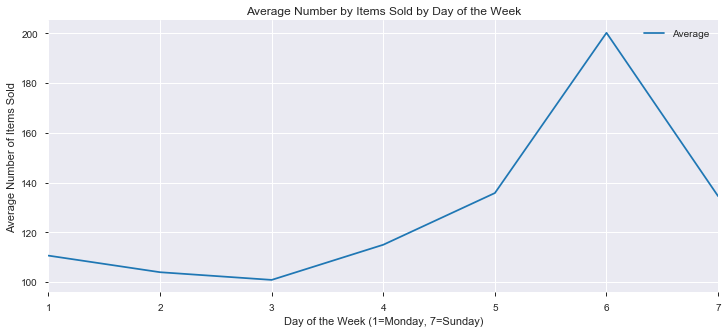

In [49]:
transaction_df_group_by_weekday.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")

In [50]:
df = transaction_df.groupby(["Transaction","Item"]).size().reset_index(name="Count")

df

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [51]:
basket = (df.groupby(['Transaction', 'Item'])['Count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [53]:
basket_sets = basket.applymap(encode_units)

basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [55]:
frequent_itemsets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Cake, Bread, Coffee)"
59,0.011199,"(Pastry, Bread, Coffee)"


In [56]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values("confidence", ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [58]:
type(rules)

pandas.core.frame.DataFrame